# Investigating TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

    This dataset contains information of about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I will be exploring this dataset to answer questions about what makes a movie profitable, top most profitable movies, most popular movies, top directors, top actors and the most popular genres.

In [2]:
# import statements for the packages I plan to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

After inspecting the dataset, I will be cleaning the data to perform my analysis. I will be removing the columns that I do not need for my anaysis, removing duplicate data, removing rows with null values and convert the budget_adj and revenue_adj columns from dollars to millions. I am also adding a profit column that I will be using for my analysis.

In [3]:
# Loading data and performing operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
df.shape

(10866, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
# rows with missing values
df.isnull().sum().sort_values(ascending=False)

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
popularity                 0
budget                     0
revenue                    0
original_title             0
revenue_adj                0
budget_adj                 0
runtime                    0
release_date               0
vote_count                 0
vote_average               0
release_year               0
id                         0
dtype: int64

In [12]:
# dropping the columns that I do need for my analysis and checking the result
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [13]:
# In the following cells I will be checking for null values and removing rows with null values
df.isnull().sum().sort_values(ascending=False)

production_companies    1030
cast                      76
director                  44
genres                    23
revenue_adj                0
budget_adj                 0
release_year               0
vote_average               0
vote_count                 0
release_date               0
runtime                    0
original_title             0
popularity                 0
dtype: int64

In [14]:
# removing rows with null values
df = df[df['production_companies'].notnull()]
df = df[df['cast'].notnull()]
df = df[df['director'].notnull()]
df = df[df['genres'].notnull()]

In [15]:
# verifying that the rows have been removed and there are no more null values
df.isnull().sum().sort_values(ascending=False)

revenue_adj             0
budget_adj              0
release_year            0
vote_average            0
vote_count              0
release_date            0
production_companies    0
genres                  0
runtime                 0
director                0
cast                    0
original_title          0
popularity              0
dtype: int64

In [16]:
# checking for duplicate data
df.duplicated().sum()

1

In [17]:
# dropping the duplicated data and verifying change
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

In [18]:
# Converting from dollars to millions
df['budget_adj'] = df['budget_adj']/1000000
df['revenue_adj'] = df['revenue_adj']/1000000

In [19]:
# Adding profit column
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [15]:
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137.999939,1392.445893,1254.445953


In [20]:
df.shape

(9772, 14)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
popularity              9772 non-null float64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
profit                  9772 non-null float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.1+ MB


### Dataset is Cleansed

The cleaning of the dataset is completed. I dropped columns that are not needed for my analysis. I removed the budget and revenue columns because I felt that the adjusted revenues and budgets were more relevant.The adjusted values are in terms of 2010 dollars that account for inflation over time.

I removed the null values and duplicated data. Going from 10866 to 9772 rows of data. Most of the removed data was from columns I dropped that weren't needed in my analysis.

I felt the revenue_adj and budget_adj columns were too big so I converted them from dollars to millions. Also added a profit column that subtracts the budget_adj from the revenue_adj. I added this column because most of my analysis is to determine what is most profitable.

<a id='eda'></a>
## Exploratory Data Analysis



### What makes a movie profitable?

#### What is the average runtime?
#### What is the correlation between runtime and profits?
#### What is the correlation between budget and profits?
#### What is the correlation between revenue and profits?
#### What is the correlation between revenue and budget?
#### What are the top 20 most profitable movies?
#### What are the top 10 movie genres by average profit?
#### What are the top 10 Directors by average profit?
#### Who are the top 10 Cast members by average profit?

## What is the average runtime of all the movies?

In [22]:
# Average runtime of all movies in minutes
df[['runtime']].apply(np.mean)

runtime    102.926627
dtype: float64

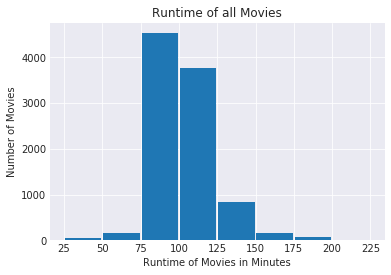

In [23]:
# Show distribution of runtimes in histogram chart
plt.title('Runtime of all Movies')
plt.xlabel('Runtime of Movies in Minutes')
plt.ylabel('Number of Movies')
plt.hist(df.runtime, bins=[25,50,75,100,125,150,175,200,225], rwidth=0.95);

### I wanted to check the average movie runtime of all the movies and found it to be 102.93 minutes. The distribution chart shows this as well. Most movies are between 80 and 125 minutes.

### What is the correlation between runtime and profits?

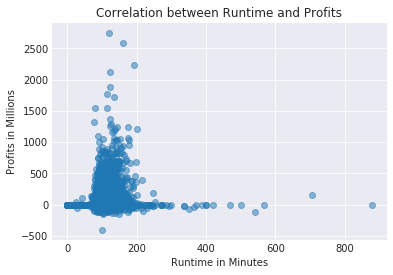

In [24]:
# See if there is a correlation between runtime and profit
plt.title('Correlation between Runtime and Profits')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Profits in Millions')
plt.scatter(df.runtime, df.profit, alpha=0.5);

### Not a strong correlation between runtime and profits. The chart makes since because most of the profit should be between 80 and 150 minutes.

### What is the correlation between budget and profits?

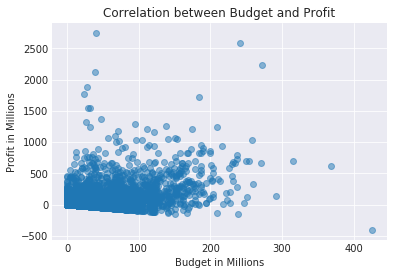

In [25]:
plt.title('Correlation between Budget and Profit')
plt.xlabel('Budget in Millions')
plt.ylabel('Profit in Millions')
plt.scatter(df.budget_adj, df.profit, alpha=0.5);

### Not a strong correlation. I was expecting to see a higher budget equals a higher the profit. 

### What is the correlation between budget and revenue?

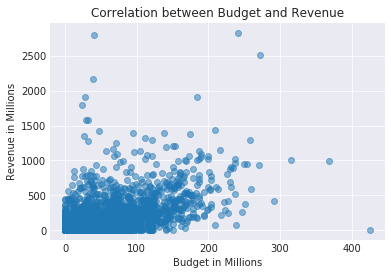

In [26]:
plt.title('Correlation between Budget and Revenue')
plt.xlabel('Budget in Millions')
plt.ylabel('Revenue in Millions')
plt.scatter(df.budget_adj, df.revenue_adj, alpha=0.5);

### Not a strong correlation. I was suprised with this result as well. Was expecting to see the more budget the higher the revenune.

### What is the correlation between revenue and profits?

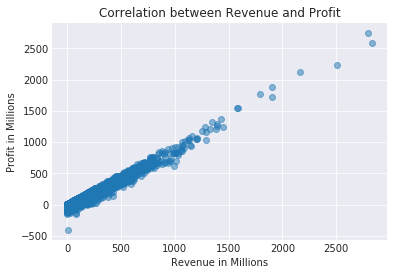

In [27]:
plt.title('Correlation between Revenue and Profit')
plt.xlabel('Revenue in Millions')
plt.ylabel('Profit in Millions')
plt.scatter(df.revenue_adj, df.profit, alpha=0.5);

### Okay here is a strong positive correlation. This makes since, the higher the revenue the higher the profit.

### What are the top 20 most profitable movies?

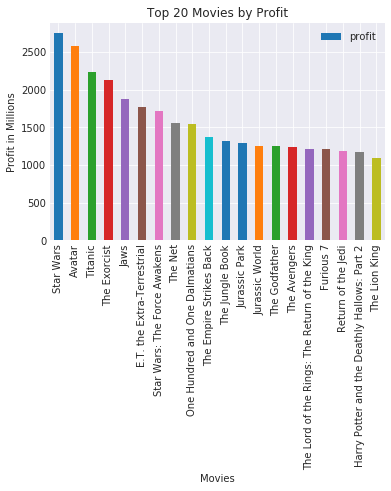

In [28]:
# Top 20 movies by profit
df.sort_values(by='profit', ascending=False).head(20).plot.bar('original_title', 'profit')
plt.title('Top 20 Movies by Profit')
plt.xlabel('Movies')
plt.ylabel('Profit in Millions');

### This is a bar chart of the top 20 most profitable movies from the dataset. Of course Star Wars takes the top spot.

### What are the top 10 movie genres by average profit?

In [29]:
# Splitting up genres by '|' and splitting into two genres
df_genre = df.genres.str.split('|',expand=True).iloc[:,0:2]
df_genre.columns=['genre_1', 'genre_2']
df_genre.genre_2.fillna(df_genre.genre_1, inplace=True)

In [30]:
# joining dataframes
df = pd.concat([df, df_genre], axis=1)

In [31]:
# making a genre by average profit.
profit_genre = df.groupby(['genre_1']).profit.mean().sort_values(ascending=False).head(10)

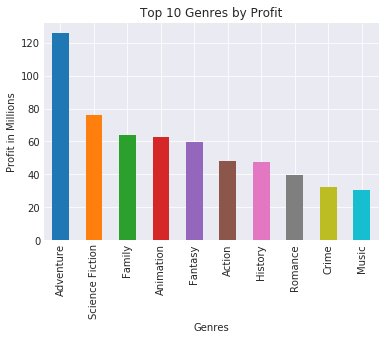

In [33]:
# charting top 10 genres by average profit
profit_genre.plot.bar()
plt.title('Top 10 Genres by Profit')
plt.xlabel('Genres')
plt.ylabel('Profit in Millions');

### Charting the top 10 genres by average profit. Here I thought what genre makes the most profit on average was the better choice. It looks like adventure, science fiction and family genres are the top 3.

### Who are the top 10 Directors by average profit?

In [34]:
# Splitting up directors by '|' and splitting into two groups
dir = df.director.str.split('|',expand=True).iloc[:,0:2]
dir.columns=['director_1', 'director_2']
dir.director_2.fillna(dir.director_1, inplace=True)

In [35]:
# joining dir and df
df = pd.concat([df, dir], axis=1)

In [36]:
# Top 10 Directors by average profit
top_dir = df.groupby('director_1').profit.mean().sort_values(ascending=False).head(10)

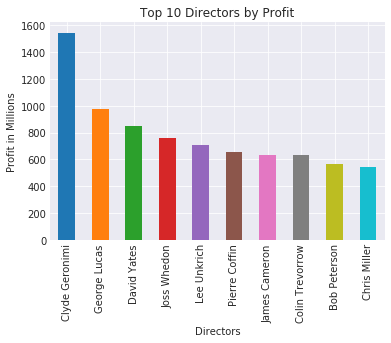

In [37]:
# top 10 directors by average profit chart
top_dir.plot.bar()
plt.title('Top 10 Directors by Profit')
plt.xlabel('Directors')
plt.ylabel('Profit in Millions');

### I wanted to see which directors make the most profit on average. We got Clyde Geronimi followed by George Lucas. I was surprised by this result and I'm not familiar with most of the names in this top 10.

### Who are the top 10 Cast members by average profit?

In [41]:
# top 10 cast by average profit
# Splitting up cast by '|' and splitting into two groups
cast = df.cast.str.split('|',expand=True).iloc[:,0:2]
cast.columns=['cast_1', 'cast_2']
cast.cast_2.fillna(cast.cast_1, inplace=True)

In [42]:
# joining cast and df
df = pd.concat([df, cast], axis=1)

In [43]:
# Top 10 Directors by average profit
top_cast = df.groupby('cast_1').profit.mean().sort_values(ascending=False).head(10)

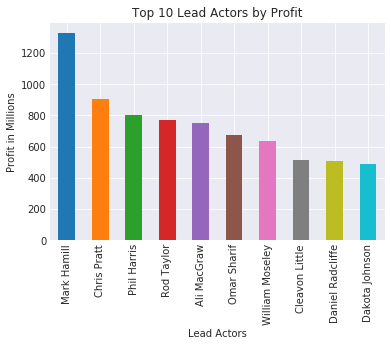

In [44]:
# top 10 cast by average profit chart
top_cast.plot.bar()
plt.title('Top 10 Lead Actors by Profit')
plt.xlabel('Lead Actors')
plt.ylabel('Profit in Millions');

### Here is a bar chart of the top 10 actors by average profit. We got Mark Hamill and Chris Pratt as the top 2.

### What is the average budget, revenue and profit from the dataset?

In [38]:
#average profit, revenue, budget in millions
df[['budget_adj', 'revenue_adj', 'profit']].apply(np.mean)

budget_adj     19.415990
revenue_adj    57.053094
profit         37.637103
dtype: float64

## Exploratory Analysis explanantion

I wanted to check the average movie runtime of all the movies and found it to be 102.93 minutes. The distribution chart shows this as well. Next I wanted to see if there was any correlation between movie runtimes and profits. There didn't seem to be and that is reasonable since most movies where around 103 minutes.

Next, I wanted to check for a correlation between profits, revenue and budget. I found that there is a strong correlation between revenue and profit. That makes since as well because the more money a movies makes the more the profitable. 

Finally, I wanted to chart the top 20 movies by profit, top 10 genres by average profit, top 10 cast (lead actors) by average profit and the top 10 directors by average profit. For the genres, directors and cast I split them into two different columns. I took the first column as being the most significant for my analysis.

<a id='conclusions'></a>
## Conclusions

In this dataset of 10,000 movies I was looking to see some characteristics of what makes a profitable movie with the data given. I was looking for relationships between profit, budget and revenue. The top movies by profit, genres by profit and directors by profit.
    
I do not have any real strong correlations except with revenue and profit. The higher the revenue the higher the profits. I was surprised so see that there was not a strong correlation between budget and profit. I would expect a high budget would have high profits. The average budget was 19.42 million. The average revenue was 57.05 million and the average profit from the dataset was 37.64 million.
    
I charted the top twenty movies by profit and Star Wars came in number one. The top genre by average profit was adventure followed by science fiction. I handled genres a little bit different. All the movies had multiple genres. I took the first genre listed to be the most significant. I did the same with the top 10 directors and the top 10 cast members. The top director for average profit was Clyde Geronimi followed by George Lucas. The top lead actor was Mark Hamill followed by Chris Pratt.
    
In conclusion, I don't feel like I have enough here to say what makes a profitable movie. I would say from this analysis to pick a top director, top 10 actor and the genre should be in the adventure category. Should have a budget around 19 million or higher. The movie should be 80 to 120 minutes long. The higher the revenue the higher your profits will be.

Limitations: This analysis was based around profit when there are a lot of other factors that go into what makes a movie profitable that isn't included in the dataset. The movies provided aren't all American movies and there is not a spcecified currency. Some of the movies could report budget and revenue in a different currency and that could throw this analysis off. I assumed for my data analysis that the currency is all in USD. I also dropped 1,094 rows of data. The dropped rows could have had some significant data that could lead to different end results. My skillset was also a limitation to the analysis. I am working to upskill and come back to this project and see how it turns out.  


In [3]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0